In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick





<head>Loading all the data sets </head>

In [16]:
department = pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\departments.txt")
ordertrain=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\order_products__train.txt")
aisels = pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\aisles.txt")


In [20]:
orderproductsprior=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\order_products__prior.txt")
orderproductsprior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


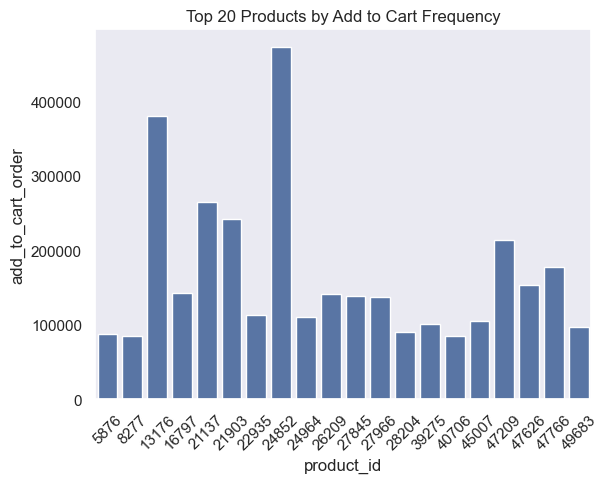

In [93]:

product_counts = orderproductsprior['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'add_to_cart_order']


sns.barplot(data=product_counts.head(20), x='product_id', y='add_to_cart_order')  # show top 20
plt.xticks(rotation=45)
plt.title("Top 20 Products by Add to Cart Frequency")
plt.show()



In [24]:

products=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\products.txt")
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


<head>Most ordered  Products</head>

In [ ]:


filter=orderproductsprior[orderproductsprior["reordered"]==1]
filter
reorderitem=filter["product_id"].value_counts().reset_index()
reorderitem=reorderitem.head(20)
df4=reorderitem.merge(products[["product_name","product_id"]],on="product_id",how="left")
df4

In [27]:
df = pd.concat([orderproductsprior, ordertrain], ignore_index=True)
df

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
33819101,3421063,14233,3,1
33819102,3421063,35548,4,1
33819103,3421070,35951,1,1
33819104,3421070,16953,2,1


In [29]:
data = {
    "product_id": [24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209, 27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204, 5876, 8277, 40706],
    "add_to_cart_order": [472565, 379450, 264683, 241921, 213584, 176815, 152657, 142951, 140627, 137905, 137057, 113426, 109778, 104823, 100060, 97315, 89632, 87746, 85020, 84255]
}

df1 = pd.DataFrame(data)


In [32]:
df2= products[["product_id", "product_name"]]

In [34]:
merge_df=pd.merge(df1,df2,on="product_id",how="inner")

In [36]:
merge_df

,product_id,add_to_cart_order,product_name
0,24852,472565,Banana
1,13176,379450,Bag of Organic Bananas
2,21137,264683,Organic Strawberries
3,21903,241921,Organic Baby Spinach
4,47209,213584,Organic Hass Avocado
5,47766,176815,Organic Avocado
6,47626,152657,Large Lemon
7,16797,142951,Strawberries
8,26209,140627,Limes
9,27845,137905,Organic Whole Milk


C:\Users\desai\AppData\Local\Temp\ipykernel_18512\2424132021.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=merge_df.head(10), x='product_name', y='add_to_cart_order', palette='deep')


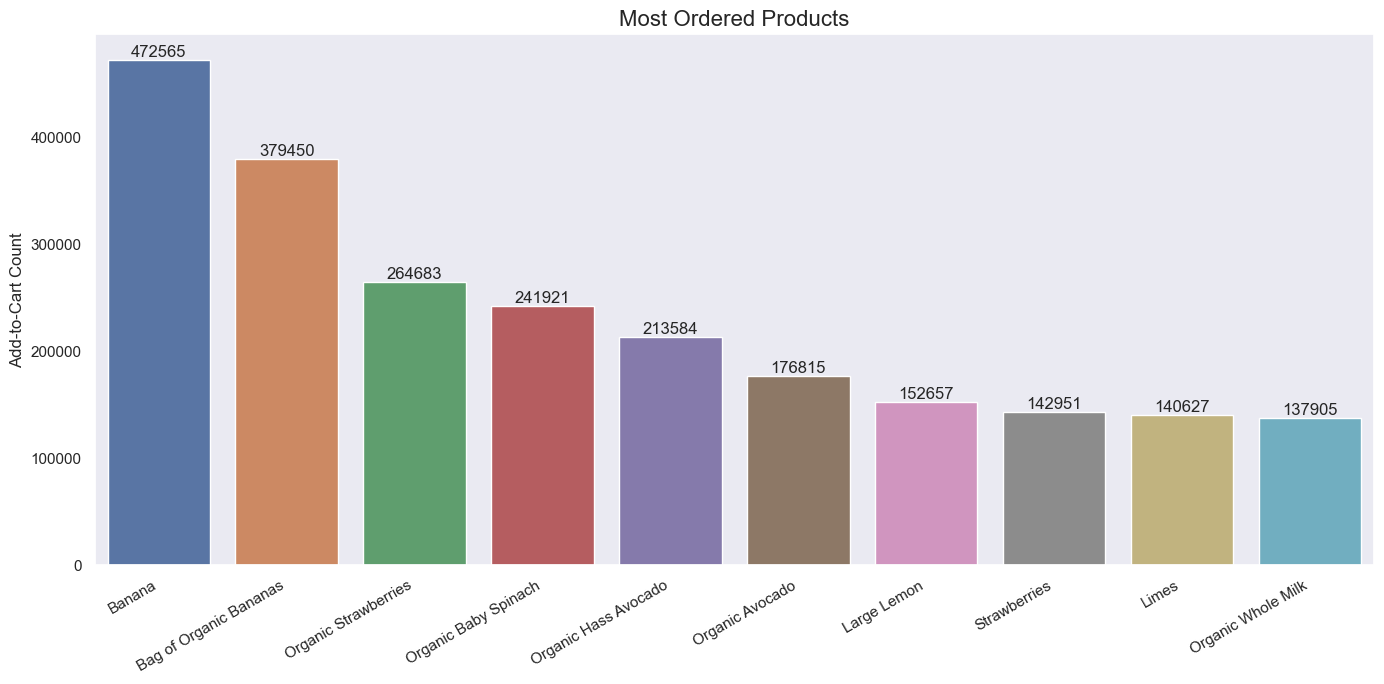

In [99]:
sns.set(style='dark')
plt.figure(figsize=(14, 7))

ax = sns.barplot(data=merge_df.head(10), x='product_name', y='add_to_cart_order', palette='deep')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                
               )

# Final touches
plt.xlabel('')
plt.ylabel('Add-to-Cart Count')
plt.title('Most Ordered Products', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
   
plt.show()




In [40]:
order=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\orders.txt")
order


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


<head>Top hours of order </head>

In [41]:
order.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [42]:
order.dropna()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [46]:
time=order.groupby("order_hour_of_day")["order_hour_of_day"].count().sort_values(ascending=False)

In [48]:
time.head(10)





order_hour_of_day
10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
Name: order_hour_of_day, dtype: int64

In [50]:
df = time.reset_index(name='order_count')

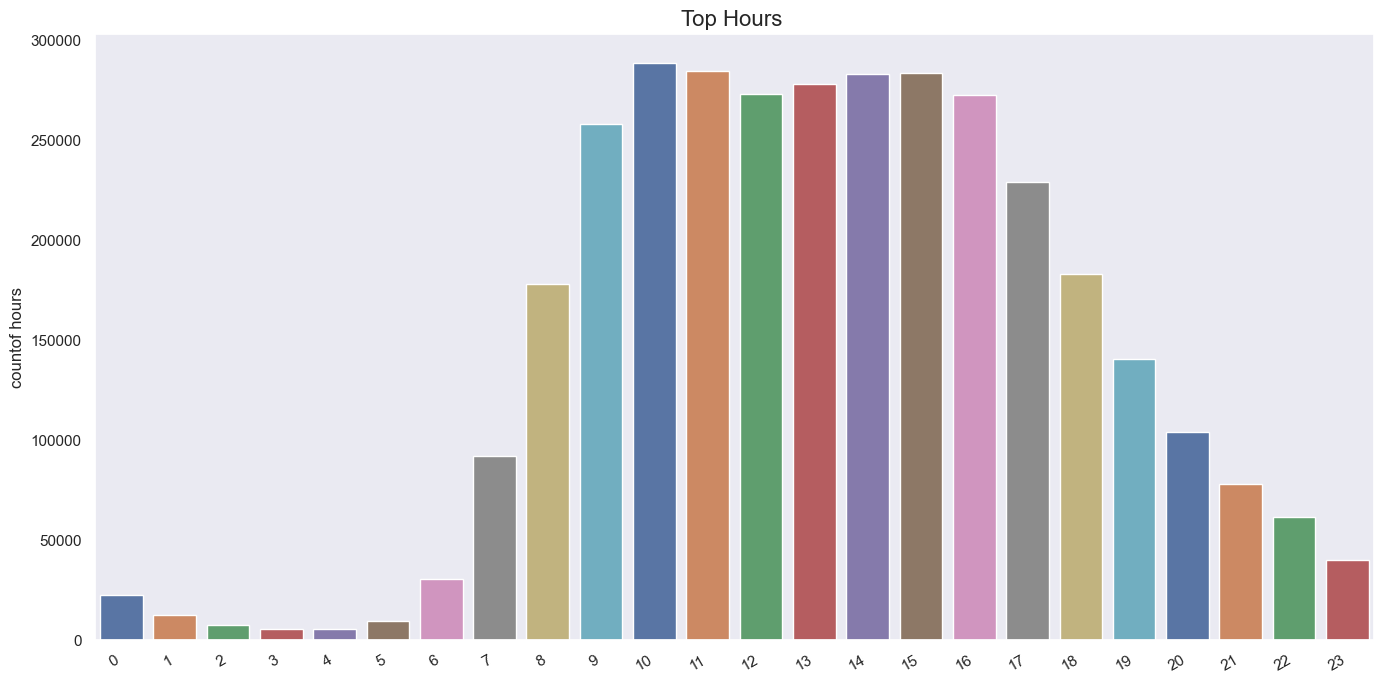

In [135]:
sns.set(style='dark')
plt.figure(figsize=(14, 7))

sns.barplot(data=df, x='order_hour_of_day', y='order_count', palette='deep',hue="order_hour_of_day",legend=False)

# Final touches
plt.xlabel('')
plt.ylabel('countof hours')
plt.title('Top Hours ', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
   



In [54]:
Dow=order.groupby("order_dow")["order_dow"].count().sort_values(ascending=False)

<head>Top days oforder in a week </head>

In [56]:
Dow

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

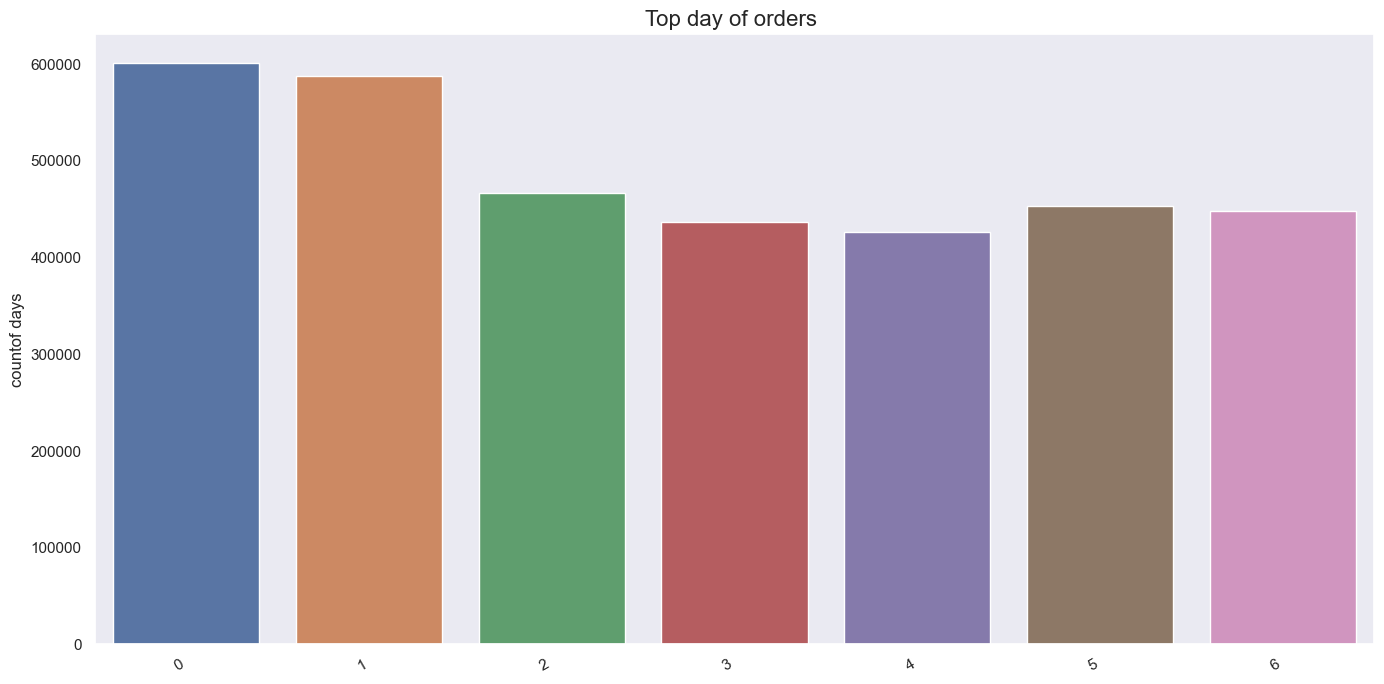

In [133]:
dow=Dow.reset_index(name="count")
sns.set(style='dark')
plt.figure(figsize=(14, 7))

sns.barplot(data=dow, x='order_dow', y='count', palette='deep',hue="order_dow",legend=False)

# Final touches
plt.xlabel('')
plt.ylabel('countof days')
plt.title('Top day of orders ', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
   

In [60]:
order=pd.read_csv(r"C:\Users\desai\OneDrive\Desktop\orders.txt")
order.dropna()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


<head>Number and ratio of order from three dataset</head>

In [61]:
order.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [62]:

whole_data_set = order["eval_set"].value_counts()
whole_data_set=pd.DataFrame(whole_data_set)
whole_data_set.column=["eval","count"]
print(whole_data_set)

            count
eval_set         
prior     3214874
train      131209
test        75000


C:\Users\desai\AppData\Local\Temp\ipykernel_18512\3322642023.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  whole_data_set.column=["eval","count"]


In [66]:
print(order.shape)
ratio=whole_data_set["count"]/3421083*100

(3421083, 7)


In [68]:
ratio

eval_set
prior    93.972406
train     3.835306
test      2.192288
Name: count, dtype: float64

In [70]:
unique_cust=order.groupby("eval_set")["user_id"].size()

In [72]:
unique_cust=pd.DataFrame(unique_cust)
unique_cust

,user_id
eval_set,
prior,3214874
test,75000
train,131209


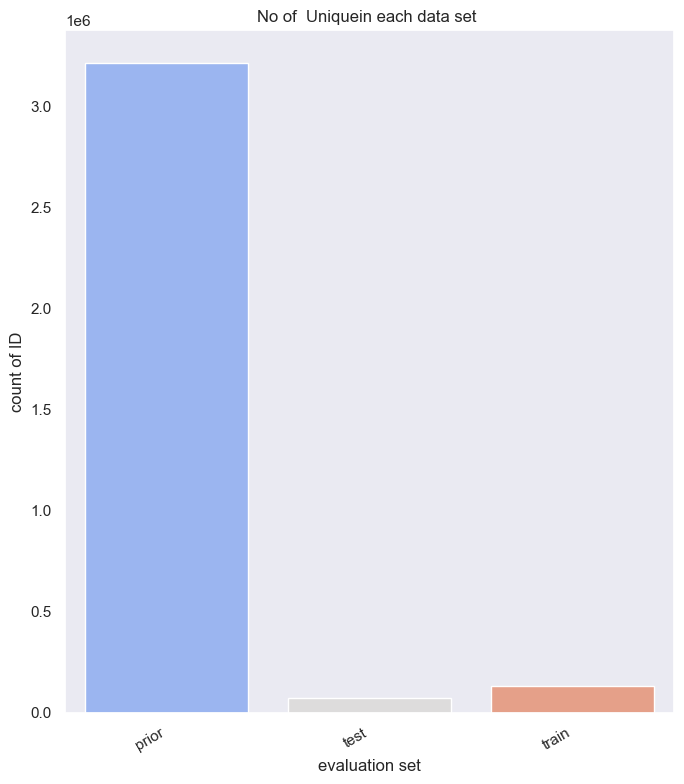

In [131]:
plt.figure(figsize=(7,8))
sns.barplot(data=unique_cust, x='eval_set', y='user_id', palette='coolwarm',hue="eval_set",legend=False)

# Final touches
plt.xlabel('evaluation set')
plt.ylabel('count of ID')
plt.title("No of  Uniquein each data set ")
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

<head>Combining of dataset</head>

In [76]:
merge=pd.merge(products,department,on=["department_id"],how="left")
merge=pd.merge(merge,aisels,on=["aisle_id"],how="left")
merge

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,alcohol,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bakery,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,pets,cat food care


<head>Important departments based on products</head>

In [78]:

imp_dep=merge.groupby("department")["product_id"].aggregate("count").sort_values(ascending=False)
imp_dep.reset_index()
imp_dep=pd.DataFrame(imp_dep)     

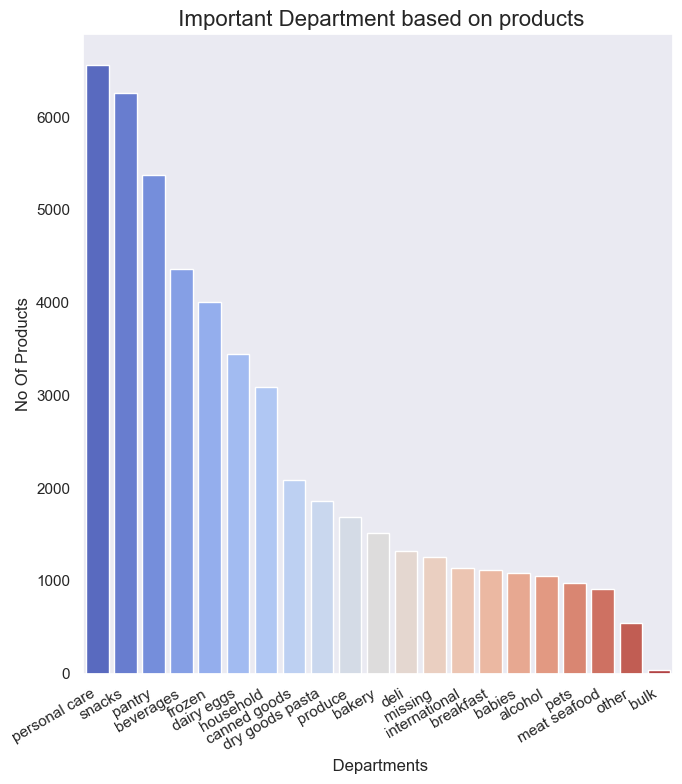

In [129]:
plt.figure(figsize=(7,8))
sns.barplot(data=imp_dep, x='department', y='product_id', palette='coolwarm',hue="department",legend=False)

# Final touches
plt.xlabel(' Departments')
plt.ylabel('No Of Products')
plt.title(' Important Department based on products', fontsize=16)
plt.xticks(rotation=30, ha='right')
#plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()

<head>Most impportant aisle in each department (By number of products)</head>

In [125]:
imp_aisle = merge.groupby(["department", "aisle"])["product_id"].agg(total_product="count").reset_index().sort_values(by="total_product",ascending=False)                                        
imp_aisle
                     

,department,aisle,total_product
85,missing,missing,1258
123,snacks,candy chocolate,1246
63,frozen,ice cream ice,1091
115,personal care,vitamins supplements,1038
42,dairy eggs,yogurt,1026
...,...,...,...
57,frozen,frozen juice,47
5,babies,baby accessories,44
121,produce,packaged produce,32
27,bulk,bulk grains rice dried goods,26


C:\Users\desai\AppData\Local\Temp\ipykernel_18512\3968619582.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
C:\Users\desai\AppData\Local\Temp\ipykernel_18512\3968619582.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
C:\Users\desai\AppData\Local\Temp\ipykernel_18512\3968619582.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
C:\Users\desai\AppData\Local\Temp\ipykernel_18512\3968619582.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(la

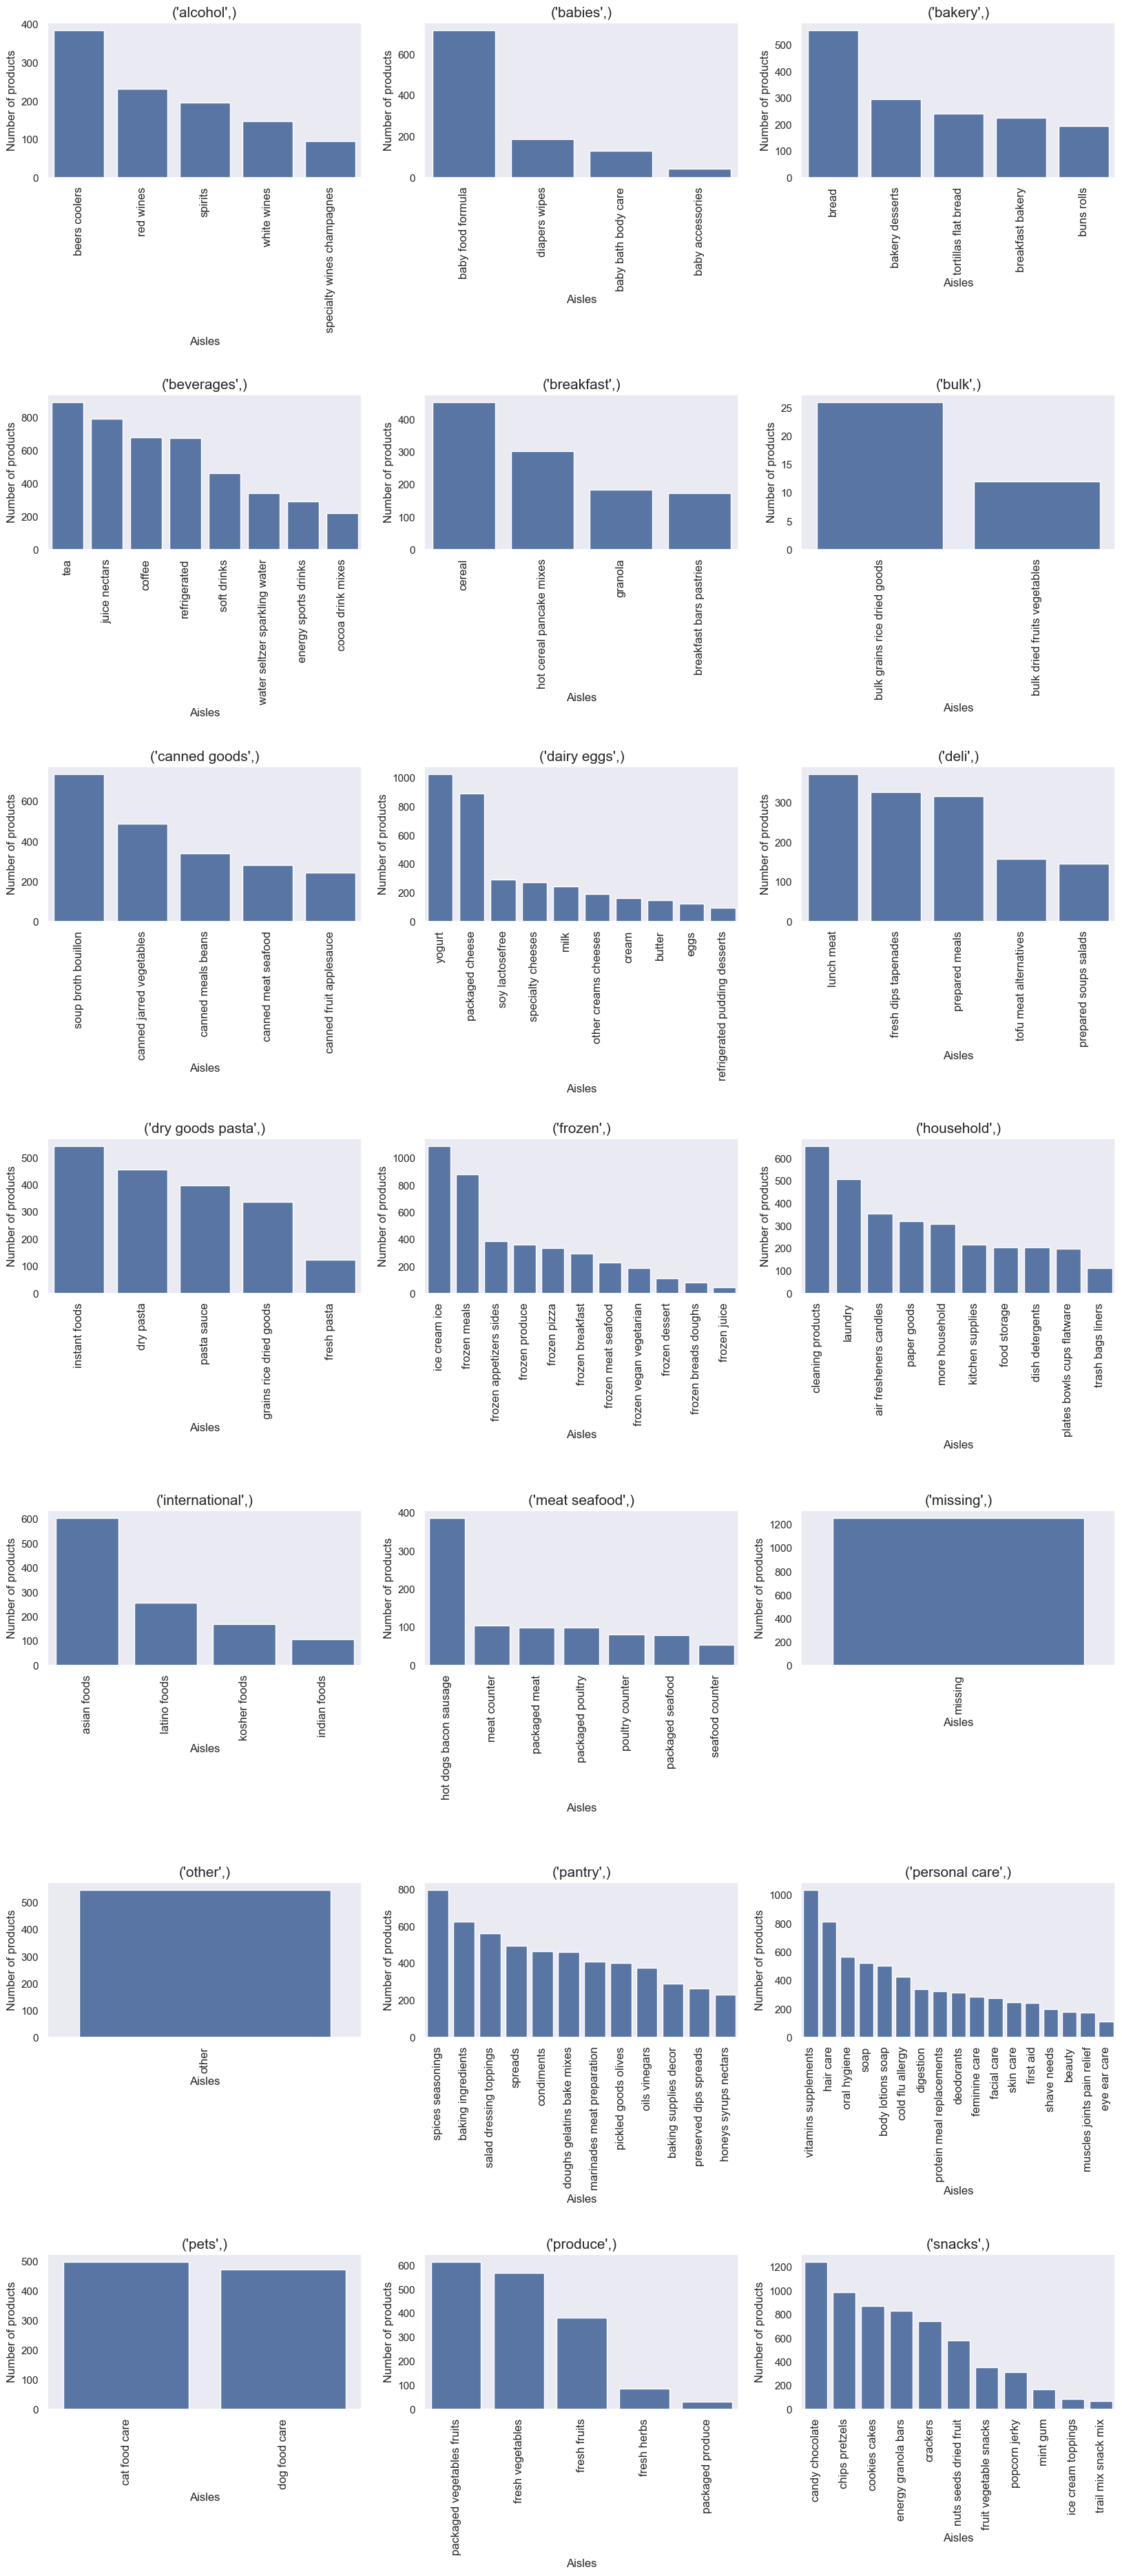

In [127]:
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(imp_aisle.groupby(["department"]), axes.flatten()):
    g = sns.barplot(x=group.aisle, y=group.total_product, ax=ax)
    ax.set(xlabel="Aisles", ylabel="Number of products")
    g.set_xticklabels(labels=group.aisle, rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)


<head>Most Important aisle over all departments </head>

In [85]:
imp_aisle=merge.groupby("aisle")["product_id"].sum().sort_values(ascending=False).reset_index()

In [88]:
imp_aisle=imp_aisle.head(20)

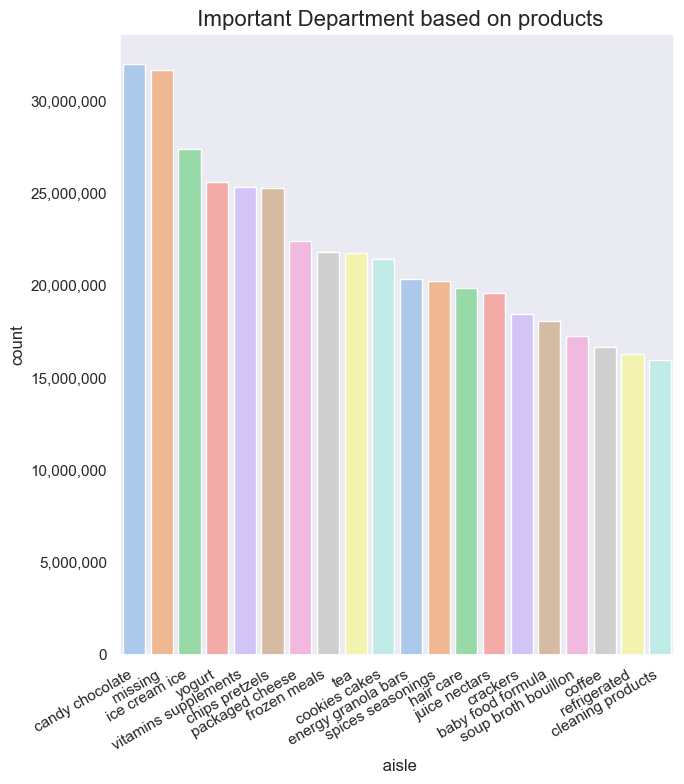

In [121]:
plt.figure(figsize=(7,8))
plt.xticks(rotation='vertical')
sns.barplot(data=imp_aisle, x='aisle', y='product_id', palette='pastel',hue="aisle",legend=False )

# Final touches
plt.xlabel(' aisle')
plt.ylabel('count')
plt.title(' Important Department based on products', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()